## Hypothesis testing and Student's T-test

### Intro

The majority of scientific studies formulate hypotheses---statement about the nature of some phenomena---and rigorously test them.
Statistical tests measure the probability of observed or collected data given a specific hypothesis.
If the probability of observing your data is small, then we can refute our given hypothesis for a more probable alternative. 

### The data
We'll use data from the [COVID tracking project](https://covidtracking.com/) on the fraction of positive COVID-19 tests across all US states.
US states will be our observations and grouped into four regions: West, South, Northeast, and Midwest.
Before we develop a hypothesis about the rate of COVID-19 between regions of the US, lets explore the data. 

### Exploratory Data Analysis

Below we read the data from an application programming interface ([API](https://en.wikipedia.org/wiki/API)) provided by developers at the covidtracking project, and merge that data with a second dataset linking states to their census region (West, South, Northeast, and Midwest).

The fraction of positive cases is computed for each state and a [boxplot](https://en.wikipedia.org/wiki/Box_plot#:~:text=In%20descriptive%20statistics%2C%20a%20box,whisker%20plot%20and%20box%2Dand%2D) is generated that includes the median, 25th and 75th percentile of the fraction of positive cases at the state level. 

In [5]:
d = pd.read_csv("https://api.covidtracking.com/v1/states/current.csv") # read data from covidtracking api
d["fracPos"] = d.positive/ d.totalTestResults # comppute the fraction of positive tests 

# read in data linking states to their census regions
censusRegions = pd.read_csv("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")

# To merge two data sets we can use the "merge" function from pandas (pd.).
# Two datasets are merged by matching up a key (list of variables in your dataset)
# from one data set with a key from another. 


In [6]:
#dataset one has the following rows and columns
print("Data set one")
d.head(3)

Data set one


,date,state,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,fracPos
0,20201013,AK,11039,NaN,503750,NaN,514789,59.0,NaN,NaN,...,0,0,881fbdb23caeb53c47e5007c8599ec1624e1c68d,0,0,0,0,0,NaN,0.021444
1,20201013,AL,167193,20110.0,1074124,NaN,1221207,823.0,18440.0,NaN,...,0,261,19ea68f7f6d374d276ce094b7473ceb24e9e0cae,0,0,0,0,0,NaN,0.136908
2,20201013,AR,94167,4816.0,1073314,NaN,1162665,601.0,6069.0,246.0,...,25,109,bacc62043d22c514733768a48aecdc636d18ee3c,0,0,0,0,0,NaN,0.080992


In [7]:
#dataset two has the following rows and columns
print("Data set two")
censusRegions.head(3)

Data set two


,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central


We want to connect data set one (DS1) one with DS2 by state---a variable that is unique to each observation and that both data sets have in common. 

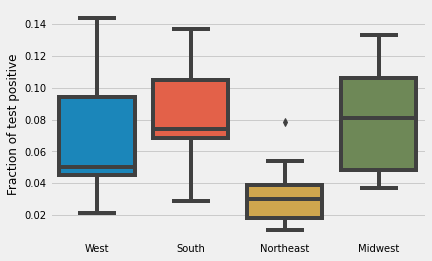

In [8]:
d = d.merge(censusRegions
            ,left_on="state"        # The variable name in DS1
            ,right_on="State Code") # The variable name in DS2

# build plot
import seaborn as sns                                   # a module with great looking plots
plt.style.use("fivethirtyeight")                        # a nice-looking style
fig,ax = plt.subplots()                                 # set up a figure and axis for plotting 
sns.boxplot( x = "Region", y= "fracPos", data=d )       # plot a box plot using the seaborn module  

ax.set_xlabel("")                                       # exclude an x label
ax.set_ylabel("Fraction of test positive",fontsize=12)  # label the vertical axis

ax.tick_params(labelsize=10)                            # change the size of the x and y ticks 

### Building a formal hypothesis (and continuing our example). 

From our exploratory analysis above we see the fraction of positive tests is smaller in the Northeast than in other census regions of the US. We may hypothesize

*States in the northeast have a smaller fraction of positive tests compared to states from all other census regions combined*

But to formally test a hypothesis we need to develop a **null hypothesis**.
A **null hypothesis $(H_{0})$** is a claim you want to refute by gathering data that suggests this hypothesis is improbable and you **alternative hypothesis $(H_{\text{A}})$**---or all possible hypothesis other than your null hypothesis---is more likely. 

Continuing with our example, I might state my **null hypothesis** as 

$H_{0}:$ *States in the northeast have the same fraction of positive tests compared to states from all other census regions combined*

and so my **alternative hypothesis** is 

$H_{\text{A}}:$ *States in the northeast DO NOT have the same fraction of positive tests compared to states from all other census regions combined*

### The 5 parts of a hypothesis

There are at minimum five parts to any formal Hypothesis test. 

#### Step 1: Generate a null and alternative hypothesis.

This involves a claim and its alternative written as clear as possible. 
When possible and often, null and alternative hypothesis describe claims about population parameters.   

For example, a null hypothesis may state that the population mean is the same between two groups (group A and group B), and so the alternative hypothesis would be all outcomes where the population means are unequal. 
Using mathematical notation we can write

\begin{align}
    H_{0}: \mu_{A} = \mu_{B} \\ 
    H_{\text{A}}: \mu_{A} \neq \mu_{B} 
\end{align}

##### Our example

For our example above we may state our null hypothesis as 

\begin{align}
    H_{0}: \mu_{\text{Northeast}} = \mu_{\text{Not Northeast}} \\ 
    H_{\text{A}}: \mu_{\text{Northeast}} \neq \mu_{\text{Not Northeast}} 
\end{align}
where $\mu$ is the average fraction of positive tests.  

#### Step 2: Define a significance level

The next step is to define a level $\alpha$ that if the probability your observed data occurred given your **null hypothesis** is smaller than $\alpha$ than you will reject your null hypothesis in favor of the alternative.




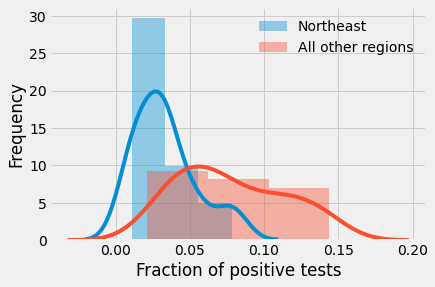

In [12]:

ne = d.loc[d.Region=="Northeast"]
so = d.loc[d.Region!="Northeast"]


fig,ax = plt.subplots()
sns.distplot( ne.fracPos,3, label = "Northeast",ax=ax )
sns.distplot( so.fracPos,3, label = "All other regions",ax=ax )

ax.set_xlabel("Fraction of positive tests")
ax.set_ylabel("Frequency")

ax.legend(frameon=False)